In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random
import glob
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.ndimage.measurements import label
from sklearn.utils import shuffle

In [2]:
vehicle_image_location=glob.glob('./data/vehicles/*/*.png')
non_vehicle_image_location=glob.glob('./data/non-vehicles/*/*.png')

vehicle_images=[]
non_vehicle_images=[]

for fname in vehicle_image_location:
    vehicle=mpimg.imread(fname)
    vehicle_images.append(vehicle)

for fname in non_vehicle_image_location:
    non_vehicle=mpimg.imread(fname)
    non_vehicle_images.append(non_vehicle)
    
print('Number of images in vehicle dataset:',len(vehicle_images))
print()
print('Number of images in Non-vehicle dataset:',len(non_vehicle_images))

Number of images in vehicle dataset: 8792

Number of images in Non-vehicle dataset: 8968


In [3]:
X = np.vstack((vehicle_images,non_vehicle_images)).astype(np.float64)
y = np.hstack((np.ones(len(vehicle_images)), np.zeros(len(non_vehicle_images))))
#rand_state = np.random.randint(0, 100)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=rand_state)
print(len(X_train))
print(len(y_train))
X_train,y_train=shuffle(X_train,y_train)

14208
14208


In [4]:
print(X_train[10].shape)

(64, 64, 3)


In [5]:
import keras
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Reshape
from keras.optimizers import Adadelta,SGD,Adam
from keras.losses import categorical_crossentropy
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
def lr_schedule(epoch):
    return 0.001*(0.1**int(epoch/10))

Using TensorFlow backend.


In [6]:
datagen=ImageDataGenerator(shear_range=0.1,rotation_range=10.,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,featurewise_center=False,featurewise_std_normalization=False)

In [7]:
X_train=X_train.astype('float32')
#X_test=X_test.astype('float32')
X_validation=X_validation.astype('float32')
#X_train/=255
#X_test/=255
#X_validation/=255

y_train=keras.utils.to_categorical(np.ravel(y_train),2)
#y_test=keras.utils.to_categorical(np.ravel(y_test),2)
y_validation=keras.utils.to_categorical(np.ravel(y_validation),2)

print(len(X_train))
print(len(y_train))

model=Sequential()
#model.add(Reshape((32,32,3), input_shape=(64,64,3)))
model.add(Conv2D(32, (3, 3), padding='SAME',input_shape=(64,64,3),activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='SAME',activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='SAME',activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
    





14208
14208


In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 31, 31, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       73856     
__________

In [9]:
batch_size=32
num_classes=2
epochs=15

In [10]:
opm=SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=opm,metrics=['accuracy'])
datagen.fit(X_train)

logits=model.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),steps_per_epoch=len(X_train)/batch_size,shuffle=True,epochs=epochs,validation_data=(X_validation,y_validation),callbacks=[LearningRateScheduler(lr_schedule),ModelCheckpoint('model.h5',save_best_only=True)])


Epoch 1/15
444/444 [==============================] - 35s 80ms/step - loss: 0.5105 - acc: 0.7733 - val_loss: 0.2752 - val_acc: 0.8891
Epoch 2/15
444/444 [==============================] - 34s 78ms/step - loss: 0.2451 - acc: 0.8990 - val_loss: 0.1693 - val_acc: 0.9322
Epoch 3/15
444/444 [==============================] - 35s 79ms/step - loss: 0.1759 - acc: 0.9300 - val_loss: 0.1078 - val_acc: 0.9651
Epoch 4/15
444/444 [==============================] - 35s 78ms/step - loss: 0.1319 - acc: 0.9491 - val_loss: 0.1007 - val_acc: 0.9634
Epoch 5/15
444/444 [==============================] - 35s 78ms/step - loss: 0.1038 - acc: 0.9626 - val_loss: 0.0848 - val_acc: 0.9704
Epoch 6/15
444/444 [==============================] - 35s 78ms/step - loss: 0.0887 - acc: 0.9679 - val_loss: 0.0736 - val_acc: 0.9749
Epoch 7/15
444/444 [==============================] - 35s 78ms/step - loss: 0.0782 - acc: 0.9714 - val_loss: 0.0655 - val_acc: 0.9752
Epoch 8/15
444/444 [==============================] - 35s 78ms

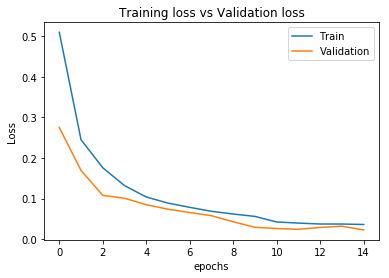

In [11]:
plt.plot(logits.history['loss'])
plt.plot(logits.history['val_loss'])
plt.title('Training loss vs Validation loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()

In [38]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

def search_windows(img, windows):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        test_img = np.expand_dims(test_img, axis=0)
        test_img=np.array(test_img)
        
        #6) Predict using your classifier
        prediction = model.predict(test_img)
       
        #7) If positive (prediction == 1) then save the window
        if (abs(prediction[0][0]-1)>=0.1):
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    

In [13]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    random_color = False
    # Iterate through the bounding boxes
    for bbox in bboxes:
        if color == 'random' or random_color: #Inspired form Jeremy Shannon Code
            color = (np.random.randint(0,255), np.random.randint(0,255), np.random.randint(0,255))
            random_color = True
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (255,0,0), 8)
    # Return the image
    return img

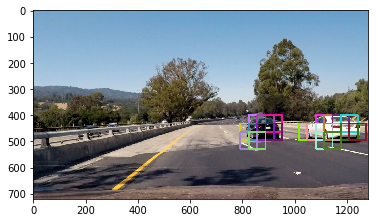

In [42]:
image=mpimg.imread('./test_images/test4.jpg')
original_img=np.copy(image)
image=image.astype(np.float32)/255
draw_image=np.copy(image)

y_start_stop = [400,656]
windows = slide_window(image, x_start_stop=[600, None], y_start_stop=y_start_stop,xy_window=(64,64), xy_overlap=(0.5, 0.5))
hot_windows = search_windows(image, windows)

window_img = draw_boxes(draw_image, hot_windows, color='random', thick=6)  
plt.imshow(window_img)
plt.show()

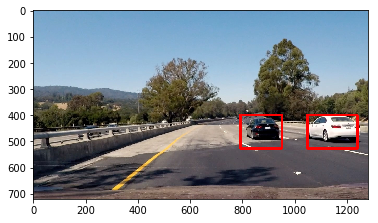

In [43]:
heat= np.zeros_like(image[:,:,0]).astype(np.float)
heatmap=add_heat(heat,hot_windows)
heatmap=apply_threshold(heatmap,1)
labels=label(heatmap)
out_img=draw_labeled_bboxes(original_img,labels)
plt.imshow(out_img)
plt.show()

In [44]:
def pipeline(image):
    original_img=np.copy(image)
    image=image.astype(np.float32)/255
    draw_image=np.copy(image)
    y_start_stop = [400,656]
    windows = slide_window(image, x_start_stop=[600, None], y_start_stop=y_start_stop,xy_window=(64,64), xy_overlap=(0.5, 0.5))
    hot_windows = search_windows(image, windows)

    window_img = draw_boxes(draw_image, hot_windows, color='random', thick=6) 
    heat= np.zeros_like(image[:,:,0]).astype(np.float)
    heatmap=add_heat(heat,hot_windows)
    heatmap=apply_threshold(heatmap,1)
    heatmap = np.clip(heatmap, 0, 255)
    labels=label(heatmap)
    out_img=draw_labeled_bboxes(original_img,labels)
    return out_img
    

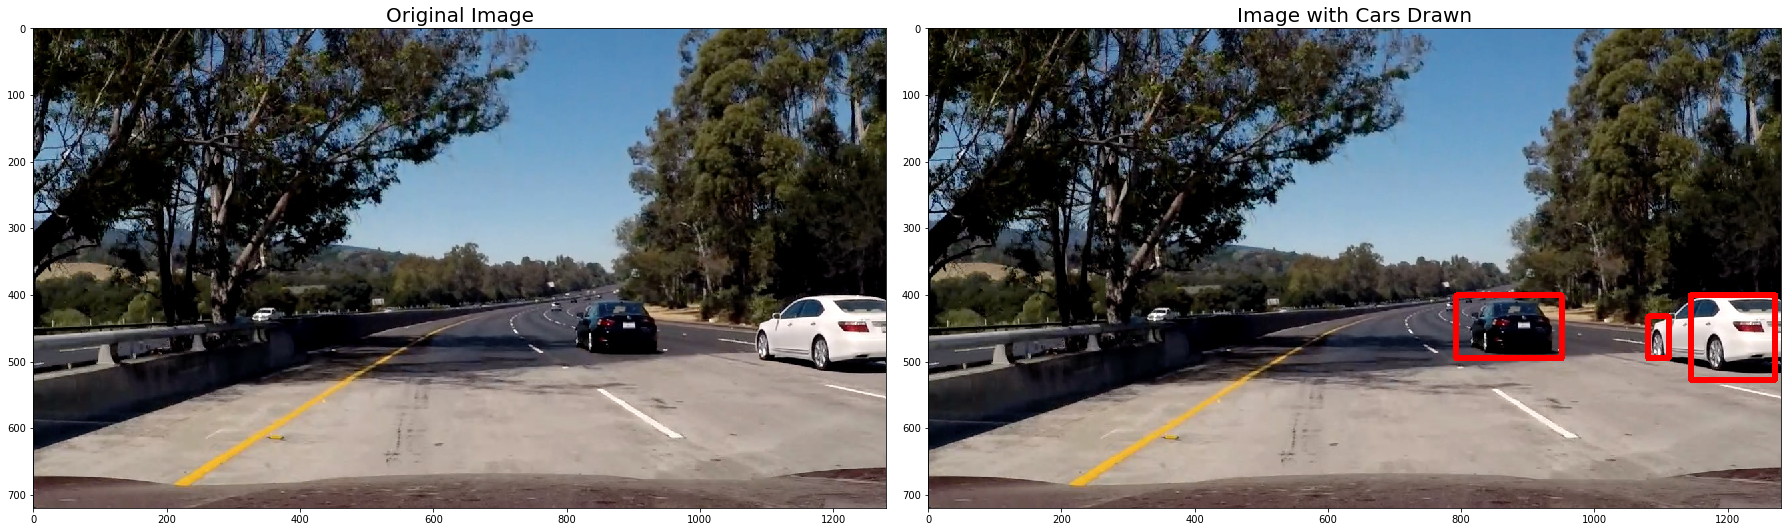

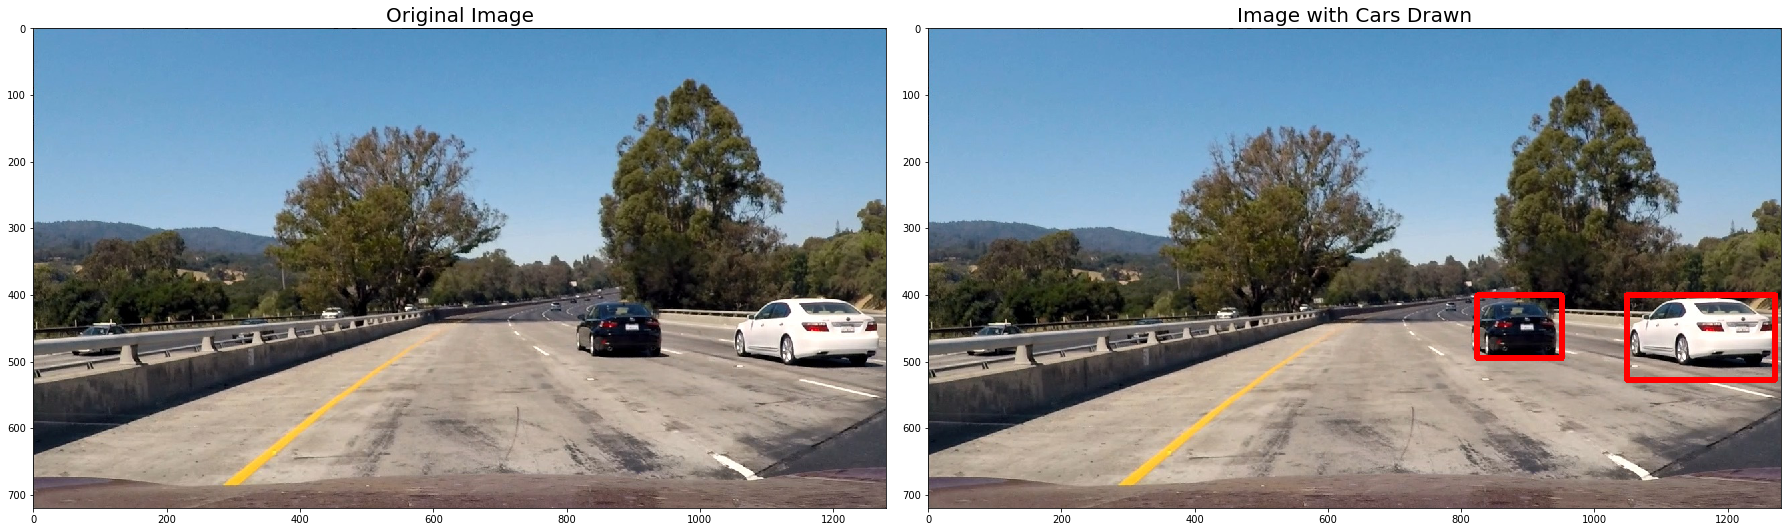

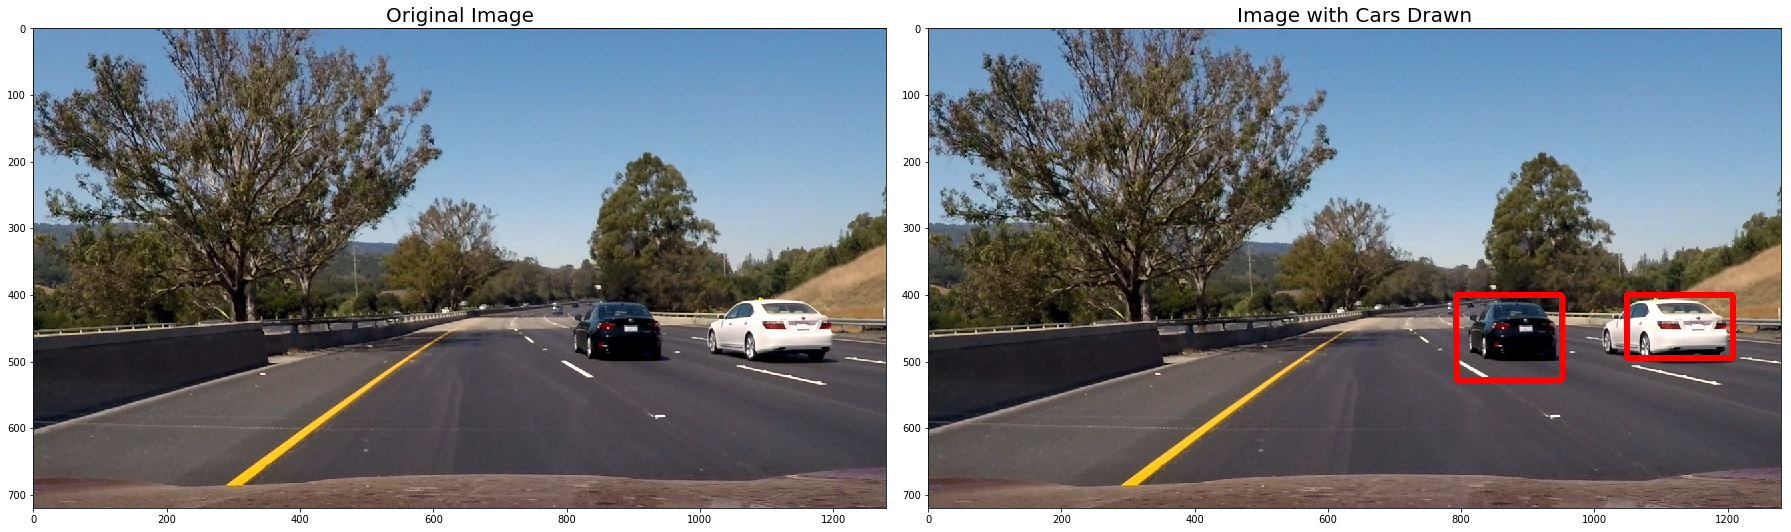

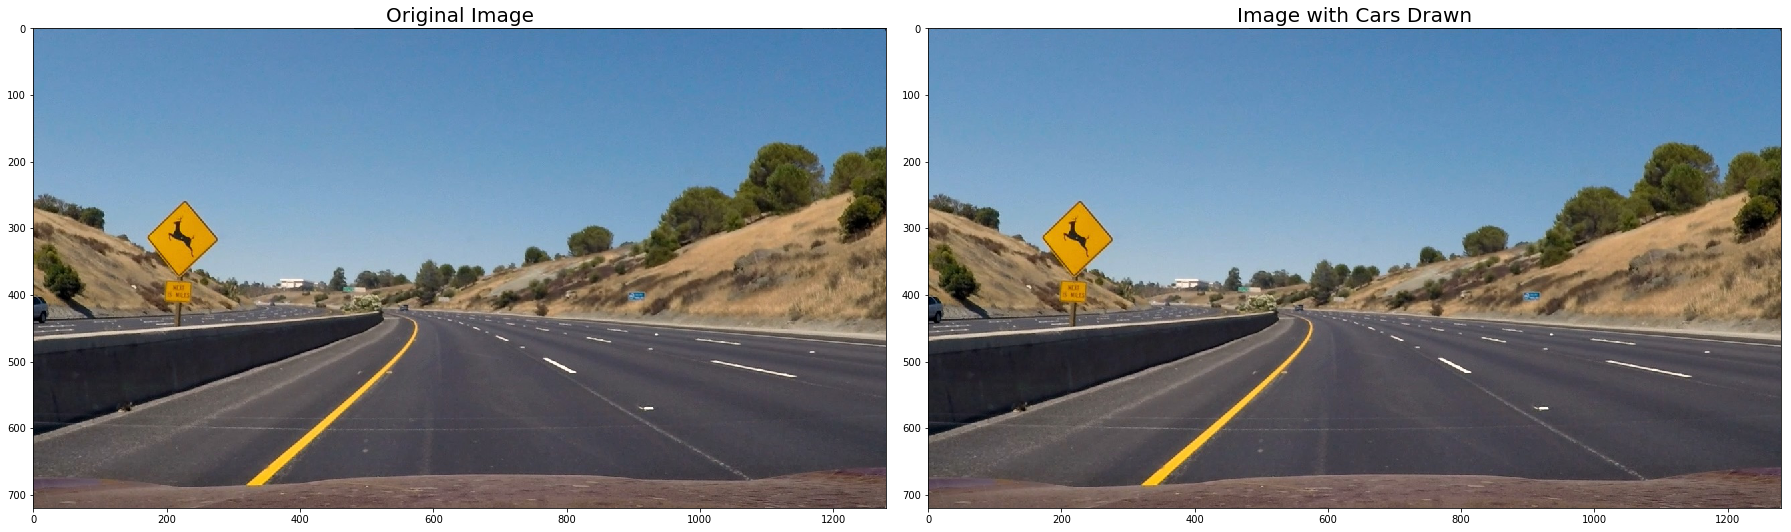

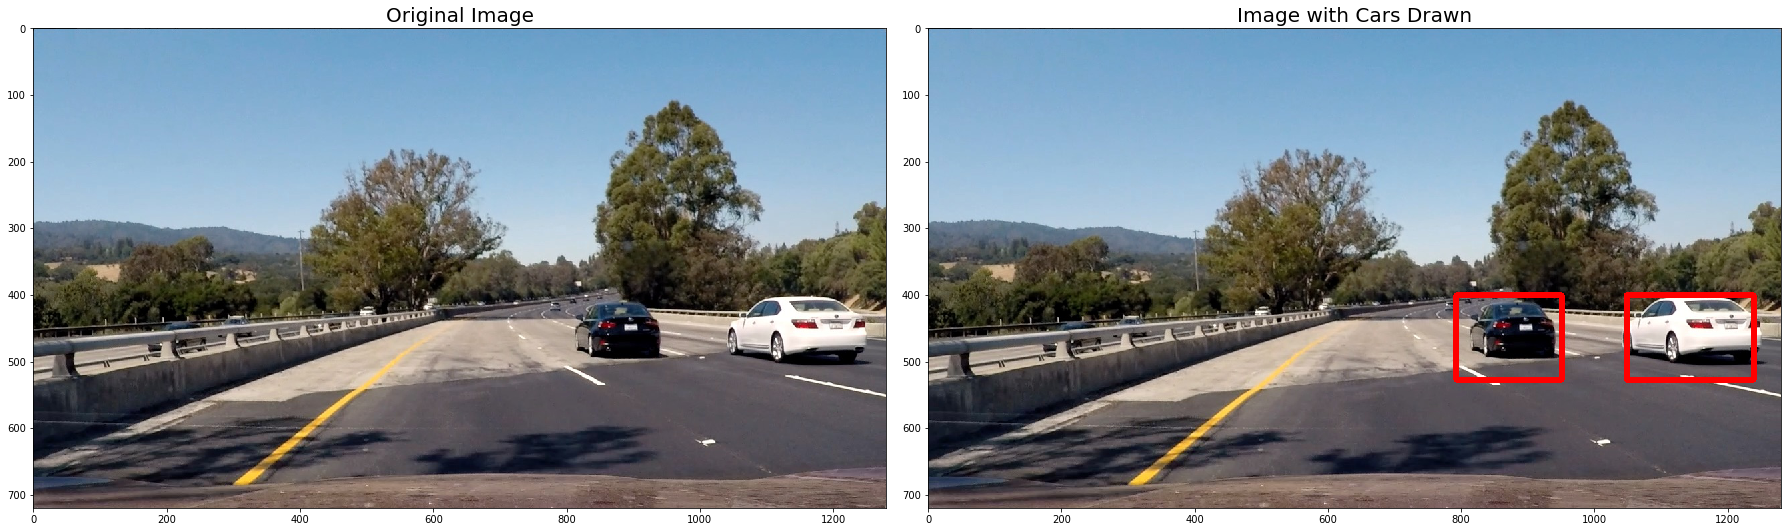

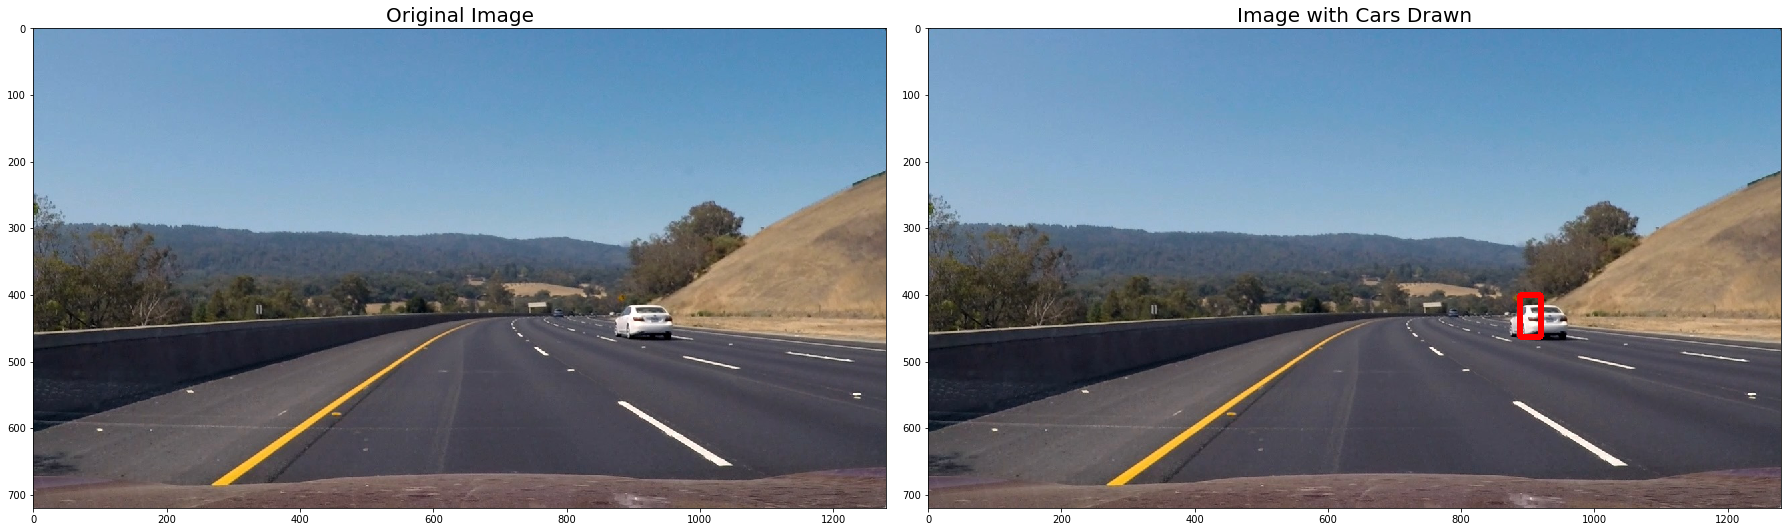

In [45]:
images=glob.glob('./test_images/*.jpg')

for file in images:
    image=mpimg.imread(file)
    out=pipeline(image)
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,25))
    fig.tight_layout()
    ax1.imshow(image)
    ax1.set_title('Original Image',fontsize=20)
    ax2.imshow(out)

    ax2.set_title('Image with Cars Drawn',fontsize=20)

In [69]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [70]:
#This one is taken from Jeremy Shannon work
class Vehicle_Detect():
    def __init__(self):
        # history of rectangles previous n frames
        self.prev_rects = [] 
        
    def add_rects(self, rects):
        self.prev_rects.append(rects)
        if len(self.prev_rects) > 15:
            # throw out oldest rectangle set(s)
            self.prev_rects = self.prev_rects[len(self.prev_rects)-15:]

In [71]:
def process_video(image):
    original_img=np.copy(image)
    image=image.astype(np.float32)/255
    draw_image=np.copy(image)
    y_start_stop = [400,656]
    windows = slide_window(image, x_start_stop=[600, None], y_start_stop=y_start_stop,xy_window=(64,64), xy_overlap=(0.5, 0.5))
    hot_windows = search_windows(image, windows)

    #window_img = draw_boxes(draw_image, hot_windows, color='random', thick=6)
    
    if len(hot_windows) >0:
        det.add_rects(hot_windows)
    
    heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    
    for rect_set in det.prev_rects:
        heatmap=add_heat(heatmap,rect_set)
    
    heatmap=apply_threshold(heatmap,1+len(det.prev_rects)//2)
    heatmap = np.clip(heatmap, 0, 255)
    labels=label(heatmap)
    out_img=draw_labeled_bboxes(original_img,labels)
    return out_img

In [72]:
det=Vehicle_Detect()
test_output = 'project_video_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("project_video.mp4").subclip(35,40)
white_clip = clip1.fl_image(process_video) #NOTE: this function expects color images!!
%time white_clip.write_videofile(test_output, audio=False)

[MoviePy] >>>> Building video project_video_output.mp4
[MoviePy] Writing video project_video_output.mp4




  0%|          | 0/126 [00:00<?, ?it/s]

  1%|          | 1/126 [00:00<01:06,  1.89it/s]

  2%|▏         | 2/126 [00:01<01:06,  1.87it/s]

  2%|▏         | 3/126 [00:01<01:05,  1.87it/s]

  3%|▎         | 4/126 [00:02<01:05,  1.87it/s]

  4%|▍         | 5/126 [00:02<01:04,  1.88it/s]

  5%|▍         | 6/126 [00:03<01:03,  1.88it/s]

  6%|▌         | 7/126 [00:03<01:03,  1.88it/s]

  6%|▋         | 8/126 [00:04<01:02,  1.88it/s]

  7%|▋         | 9/126 [00:04<01:02,  1.87it/s]

  8%|▊         | 10/126 [00:05<01:01,  1.88it/s]

  9%|▊         | 11/126 [00:05<01:01,  1.88it/s]

 10%|▉         | 12/126 [00:06<01:00,  1.87it/s]

 10%|█         | 13/126 [00:06<01:00,  1.88it/s]

 11%|█         | 14/126 [00:07<00:59,  1.87it/s]

 12%|█▏        | 15/126 [00:08<00:59,  1.87it/s]

 13%|█▎        | 16/126 [00:08<00:58,  1.87it/s]

 13%|█▎        | 17/126 [00:09<00:58,  1.87it/s]

 14%|█▍        | 18/126 [00:09<00:57,  1.87it/s]

 15%|█▌        | 19/126 [00:10<00:57,  1.87it/s]

 16%|█▌        |

[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_output.mp4 

CPU times: user 1min 11s, sys: 12.7 s, total: 1min 24s
Wall time: 1min 10s


In [73]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(test_output))